#**TOPIC MODELLING** :-
Topic modeling is an unsupervised machine learning technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents.



#**Latent Dirichlet Allocation (LDA)** :-
is a popular topic modeling technique to extract topics from a given corpus. The term latent conveys something that exists but is not yet developed. In other words, latent means hidden or concealed. Now, the topics that we want to extract from the data are also “hidden topics”.



Topic (topic_id + 1): ftopic)
Topic (topic_id + 1): ftopic)
Topic (topic_id + 1): ftopic)
Topic (topic_id + 1): ftopic)
Topic (topic_id + 1): ftopic)


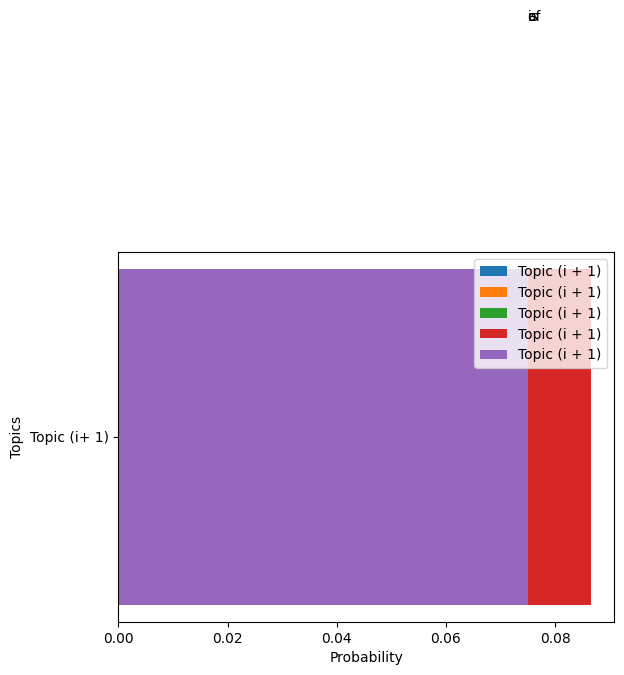

In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
import matplotlib.pyplot as plt

# Sample documents
documents = [
    "Machine learning is a subset of artificial intelligence.",
    "Natural language processing is a field of study in artificial intelligence.",
    "Deep learning is a subfield of machine learning.",
    "Topic modeling is a technique for discovering topics in a collection of documents.",
    "Latent Dirichlet Allocation (LDA) is a popular topic modeling technique.",
    "LDA can be used to extract topics from text data."
]

# Tokenize the documents
tokenized_documents = [doc.lower().split() for doc in documents]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_documents)

# Convert the tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

# Build the LDA model
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=5)
# Visualize the topics
topics = lda_model.print_topics(num_words=3)
for i, (topic_id, topic) in enumerate(topics):
  print(f"Topic (topic_id + 1): ftopic)")
# Visualize the topics using matplotlib
fig, ax = plt.subplots()
for i in range(lda_model.num_topics):
  words = [word for word, _ in lda_model.show_topic(i, topn=3)] # Extract words from th
  probabilities = [prob for _, prob in lda_model.show_topic(i, topn=3)] # Extract proba
  ax.barh(f"Topic (i+ 1)", probabilities, label=f"Topic (i + 1)")
for j, word in enumerate(words):
  ax.text(probabilities[j], f"Topic (i + 1)", word, va="center") # Add word labels
ax.set_xlabel ("Probability")
ax.set_ylabel( "Topics")
ax.legend()
plt.show()

Topic 1: 0.090*"a" + 0.071*"is" + 0.066*"modeling"
Topic 2: 0.073*"a" + 0.056*"is" + 0.055*"of"
Topic 3: 0.058*"language" + 0.057*"study" + 0.057*"field"
Topic 4: 0.075*"a" + 0.075*"machine" + 0.075*"of"
Topic 5: 0.044*"natural" + 0.044*"of" + 0.042*"intelligence."


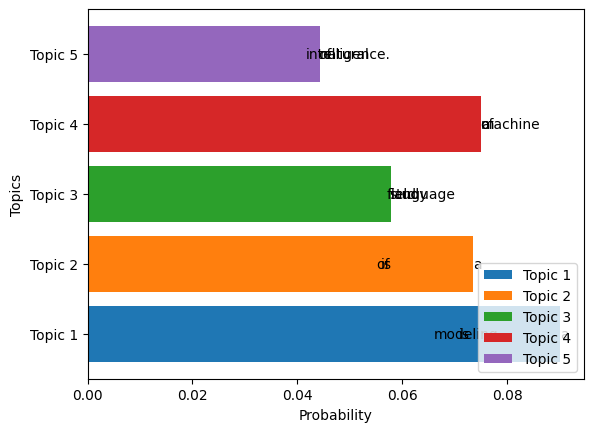

In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
import matplotlib.pyplot as plt

# Sample documents
documents = [
    "Machine learning is a subset of artificial intelligence.",
    "Natural language processing is a field of study in artificial intelligence.",
    "Deep learning is a subfield of machine learning.",
    "Topic modeling is a technique for discovering topics in a collection of documents.",
    "Latent Dirichlet Allocation (LDA) is a popular topic modeling technique.",
    "LDA can be used to extract topics from text data."
]

# Tokenize the documents
tokenized_documents = [doc.lower().split() for doc in documents]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_documents)

# Convert the tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

# Build the LDA model
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=5)

# Visualize the topics
topics = lda_model.print_topics(num_words=3)
for i, (topic_id, topic) in enumerate(topics):
    print(f"Topic {topic_id + 1}: {topic}")

# Visualize the topics using matplotlib
fig, ax = plt.subplots()
for i in range(lda_model.num_topics):
    words = [word for word, _ in lda_model.show_topic(i, topn=3)] # Extract words from the topic
    probabilities = [prob for _, prob in lda_model.show_topic(i, topn=3)] # Extract probabilities
    ax.barh(f"Topic {i + 1}", probabilities, label=f"Topic {i + 1}")
    for j, word in enumerate(words):
        ax.text(probabilities[j], i, word, va="center") # Add word labels
ax.set_xlabel("Probability")
ax.set_ylabel("Topics")
ax.legend()
plt.show()


In [ ]:
import os
import gensim
from gensim.models.coherencemodel import CoherenceModel
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt

# Function to load a document from a file with specified encoding
def load_document_from_file(file_path, encoding='utf-8'):
    with open(file_path, 'r', encoding=encoding, errors='ignore') as file:
        document = file.read()
    return document

# Preprocess documents
def preprocess_document(document):
    # Tokenization
    tokenized_doc = word_tokenize(document.lower())

    # Removing stop words and punctuation
    stop_words = set(stopwords.words('english'))
    stop_words.update(string.punctuation)
    filtered_doc = [word for word in tokenized_doc if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    preprocessed_doc = [lemmatizer.lemmatize(word) for word in filtered_doc]

    return preprocessed_doc

# Train LDA model
def train_lda_model(document, num_topics):
    dictionary = corpora.Dictionary([document])
    corpus = [dictionary.doc2bow(document)]

    lda_model = LdaModel(corpus, id2word=dictionary, num_topics=num_topics)

    return lda_model

# Extract dominant topics for the document
def extract_dominant_topics(lda_model, document):
    bow = lda_model.id2word.doc2bow(document)
    topics = lda_model.get_document_topics(bow, minimum_probability=0.1)
    dominant_topic = max(topics, key=lambda x: x[1])[0]
    return dominant_topic

# Identify key sentences or paragraphs in the document
def identify_key_sentence(document, lda_model, dominant_topic):
    sentences = sent_tokenize(document)
    key_sentence = sentences[0]  # Initialize with the first sentence
    max_topic_prob = 0
    for sentence in sentences:
        sentence_words = word_tokenize(sentence.lower())
        bow = lda_model.id2word.doc2bow(sentence_words)
        topics = lda_model.get_document_topics(bow, minimum_probability=0.1)
        dominant_topic_prob = max(topics, key=lambda x: x[1])[1]
        if dominant_topic == max(topics, key=lambda x: x[1])[0] and dominant_topic_prob > max_topic_prob:
            key_sentence = sentence
            max_topic_prob = dominant_topic_prob
    return key_sentence

# Plot the topics
def plot_topics(lda_model, num_words=5):
    fig, axes = plt.subplots(nrows=lda_model.num_topics, figsize=(10, 8), sharex=True)
    axes = axes.flatten()
    for i in range(lda_model.num_topics):
        topic_words = dict(lda_model.show_topic(i, topn=num_words))
        axes[i].barh(list(topic_words.keys()), list(topic_words.values()), color='skyblue')
        axes[i].invert_yaxis()
        axes[i].set_title(f"Topic {i+1}", fontdict={'fontsize': 12})
    fig.tight_layout()
    plt.show()

# File path of the research paper
file_path = '/content/drive/MyDrive/Colab Notebooks/NLP/snowy_story.txt'



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Choose:
1) File
2) Text corpus
2
Text: A short story is a piece of prose fiction that can typically be read in a single sitting and focuses on a self-contained incident or series of linked incidents, with the intent of evoking a single effect or mood. The short story is one of the oldest types of literature and has existed in the form of legends, mythic tales, folk tales, fairy tales, tall tales, fables and anecdotes in various ancient communities around the world. The modern short story developed in the early 19th century.


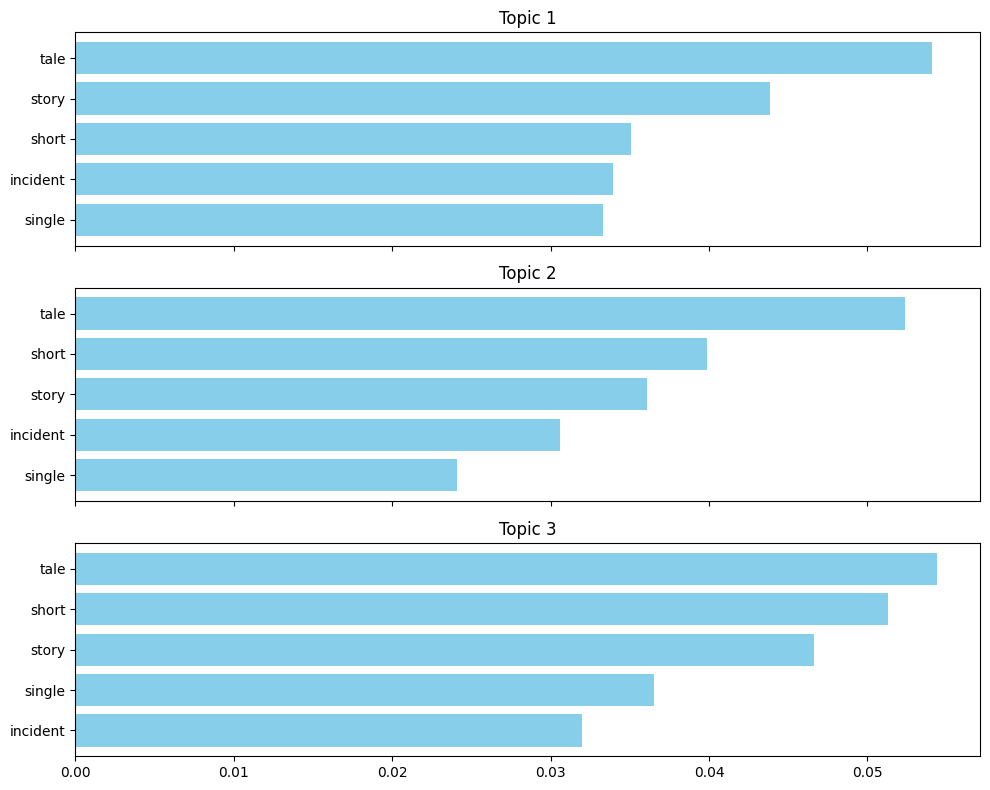

In [ ]:
i = int(input("Choose:\n1) File\n2) Text corpus\n"))
if i==1:
  file_path = input("Path: ")
  document = load_document_from_file(file_path)
else:
  document = input("Text: ")


preprocessed_doc = preprocess_document(document)


num_topics = 3
lda_model = train_lda_model(preprocessed_doc, num_topics)


dominant_topic = extract_dominant_topics(lda_model, preprocessed_doc)


key_sentence = identify_key_sentence(document, lda_model, dominant_topic)


plot_topics(lda_model)